

# fuzzylogic


Fuzzy logic wordt al decennia toegepast in regeltechniek, robotica en kunstmatige intelligentie. Met de opkomst van Python zijn meerdere fuzzy-logic-bibliotheken beschikbaar gekomen.  De analyse richt zich zowel op studenten als engineers die overwegen dit raamwerk te gebruiken voor onderwijs, simulatie of prototyping.


Fuzzy logic werd in 1965 geïntroduceerd door Lotfi Zadeh als een alternatief voor klassieke booleaanse logica, met als doel menselijke redeneerprocessen beter te modelleren. In plaats van binaire waar/onwaar-waarden, werkt fuzzy logic met **graduele lidmaatschapsgraden** tussen 0 en 1.

## Is het framework simpel te gebruiken?


Het raamwerk blinkt uit in **lage instapdrempel**. Membership functions kunnen met enkele regels code worden gedefinieerd, vaak zonder complexe objectstructuren. Voorbeelden zoals R-, S- en driehoekige functies zijn direct beschikbaar.

Voordelen:

* Geen zware configuratie
* Geen verplicht gebruik van klassen


Nadeel:

* Minder begeleiding voor grote systemen
* Weinig ingebouwde validatie



## Code complexiteit



De code volgt vrijwel direct de **wiskundige definitie** van fuzzy sets. Bijvoorbeeld:

* `min()` → fuzzy AND
* `max()` → fuzzy OR
* Lambda-functies → lidmaatschapsfuncties


## Sneelheid en prestaties

* Geen C-extensies
* Geen vectorisatie zoals in NumPy
* Geen GPU-ondersteuning

is de snelheid echter ruim voldoende.

Voor industriële real-time systemen zijn alternatieven beter geschikt.

## Is grafische output mogelijk?


Omdat het raamwerk volledig compatibel is met:

* `matplotlib`
* `numpy`
* Jupyter Notebooks

kunnen membership functions en regeloppervlakken eenvoudig worden gevisualiseerd.

Dit is cruciaal voor:

* Analyse
* Debugging
* Rapportage


##  Is het veilig toepasbaar in robotica?

Fuzzy logic wordt niet direct gebruikt in safety-critical systemen vanwege de inherente onzekerheid. Echter, in combinatie met andere technieken zoals formele verificatie en redundantie, kan het bijdragen aan robuuste beslissingssystemen.

Het is  geschikt voor simulatie en ontwerp, maar niet voor directe inzet in:

Industriële robots

Medische systemen

Autonome voertuigen

zonder aanvullende validatie en herimplementatie in een real-time omgeving.


Slow(30): 0.5
Medium(60): 1.0
Fast(100): 0.6


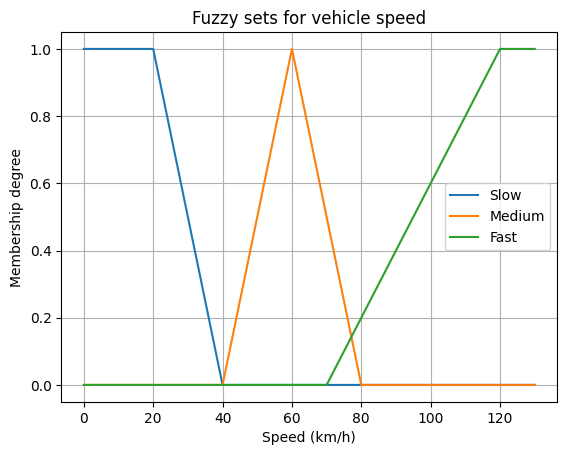

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fuzzylogic.functions import R

# Linear decreasing S-shape (left shoulder)
def S_linear_inv(a, b):
    return lambda x: (
        1 if x <= a else
        0 if x >= b else
        (b - x) / (b - a)
    )

# Define fuzzy sets (speed in km/h)

# Slow: fully slow up to 20 km/h, then decreases
slow = S_linear_inv(20, 40)

# Medium: triangular with peak at 60 km/h
medium_up   = R(40, 60)
medium_down = lambda x: 1 - R(60, 80)(x)

def medium(x):
    return min(medium_up(x), medium_down(x))

# Fast: increases from 70 to 120 km/h
fast = R(70, 120)

# Test memberships
print("Slow(30):", slow(30))
print("Medium(60):", medium(60))   # peak
print("Fast(100):", fast(100))

# Visualization
x = np.linspace(0, 130, 300)
plt.plot(x, [slow(v) for v in x], label="Slow")
plt.plot(x, [medium(v) for v in x], label="Medium")
plt.plot(x, [fast(v) for v in x], label="Fast")

plt.xlabel("Speed (km/h)")
plt.ylabel("Membership degree")
plt.title("Fuzzy sets for vehicle speed")
plt.legend()
plt.grid(True)
plt.show()